# Workbook 00 - Solving beams with `PyNite`

In [2]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model

# Task 01

Create a `FEModel3D` object to analyze the following beam, where the green loads represent dead load and the orange load represents live load:

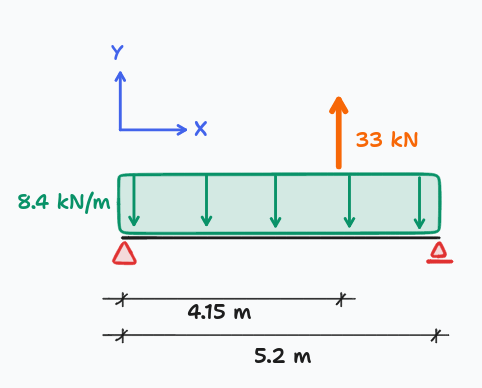

The beam is to have the following attributes:

```
E = 23000 MPa
Iz = 400e6 MPa
```

* Use `print()` to print the reactions
* Plot the shear diagram
* PLot the moment diagram

## Task 01 Response

{'LC1': 30576.0, 'LC2': 15546.461538461539}
{'LC1': 30576.0, 'LC2': -15930.461538461539}


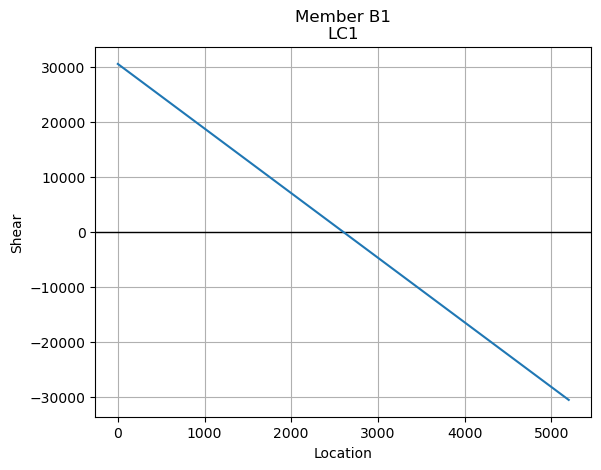

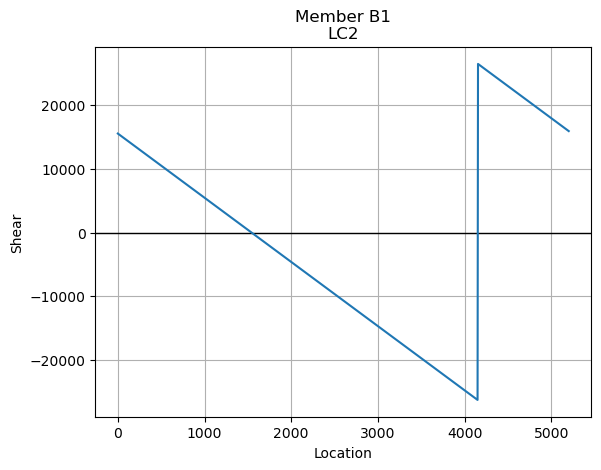

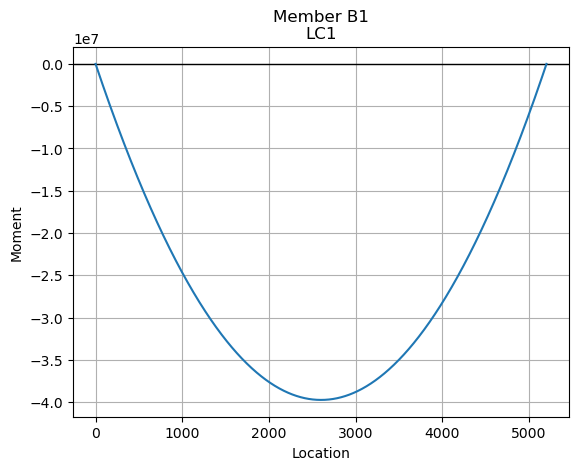

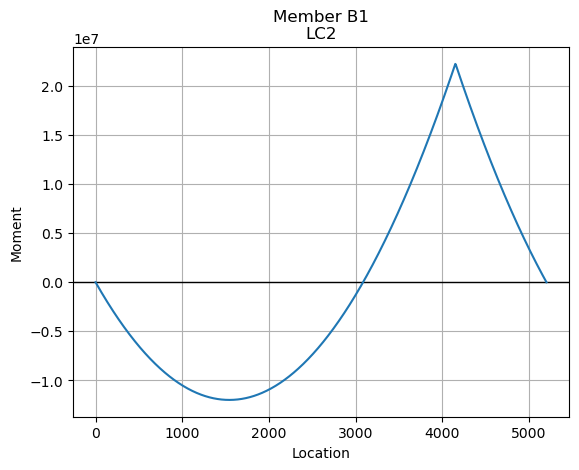

In [29]:
#ALL UNITS ARE IN N,mm
#Step1: Create an empty model
beam_model_T01 = FEModel3D()

# Step2:Define nodes (All co-ordinates are X,Y,Z)
beam_model_T01.add_node(name="N01", X=0, Y=0, Z=0)
beam_model_T01.add_node(name="N02", X=5200, Y=0, Z=0)

#Step3: Define member and connect to nodes
beam_model_T01.add_member(name="B1", i_node='N01', j_node='N02', E=23000, G=77e3, Iy=20e6, Iz=400e6, J=30e3, A=1500)

#Step4: Define supports
beam_model_T01.def_support(node_name="N01", support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=False, support_RZ=False)
beam_model_T01.def_support(node_name="N02", support_DX=False, support_DY=True, support_DZ=True, support_RX=False, support_RY=False, support_RZ=False)

#Step5: Define Loads and Load combinations
beam_model_T01.add_load_combo("LC1",{'D': 1.4})
beam_model_T01.add_load_combo("LC2",{'D': 1.2,'L':1.6})

beam_model_T01.add_member_pt_load("B1", "Fy", 33000, 4150, case='L')
beam_model_T01.add_member_dist_load("B1", "Fy", -8.4, -8.4, case='D')

#Step6: Run Analysis
beam_model_T01.analyze()

#Results
#1. Print reactions
print(beam_model_T01.Nodes['N01'].RxnFY)
print(beam_model_T01.Nodes['N02'].RxnFY)

#2. Plot shear diagram
beam_model_T01.Members['B1'].plot_shear("Fy", "LC1", 1000)
beam_model_T01.Members['B1'].plot_shear("Fy", "LC2", 1000)

#3. Plot moment diagram
beam_model_T01.Members['B1'].plot_moment("Mz", "LC1", 1000)
beam_model_T01.Members['B1'].plot_moment("Mz", "LC2", 1000)

# Task 02

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 3.6 m long
* 45 MPa concrete, 300x600 dp beam
* Fixed support @:
    * 0 m  
* Loads as follows:
    * UDL of self-weight
    * UDL of 60 kN/m Live load
    * Point load of 175 kN @ 2.2 m Live load
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

Note: You will need to calculate the E and I of the beam. You can use whatever code calculations you like but remember you need to keep your force/distance/stress units consistent across all inputs in order for the results to make sense.

## Task 02 Response

{'LC1': 2268000000.0, 'LC2': 1944625599.9999998}
{'LC1': 0.0, 'LC2': 0.0}


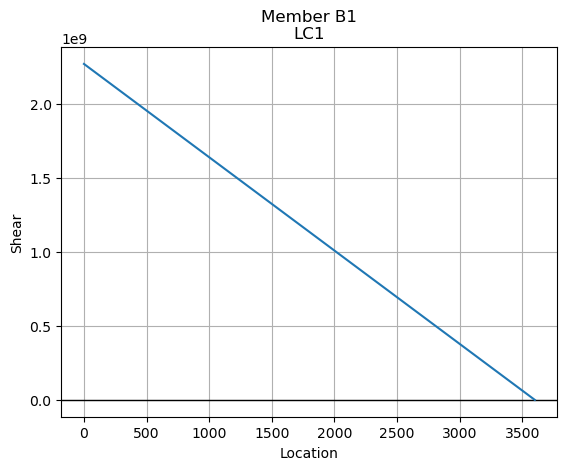

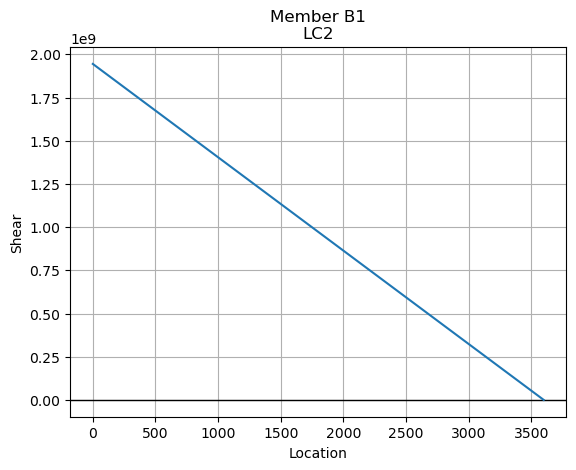

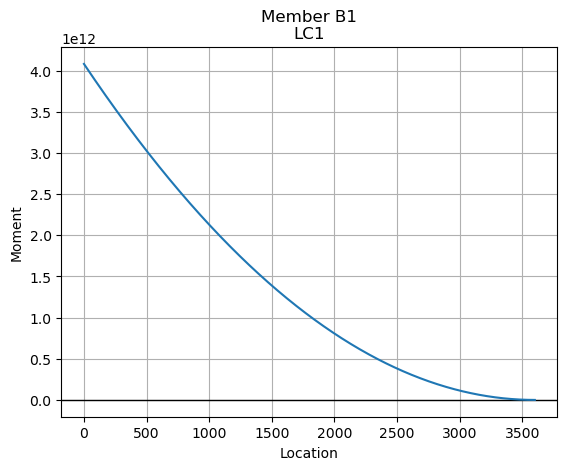

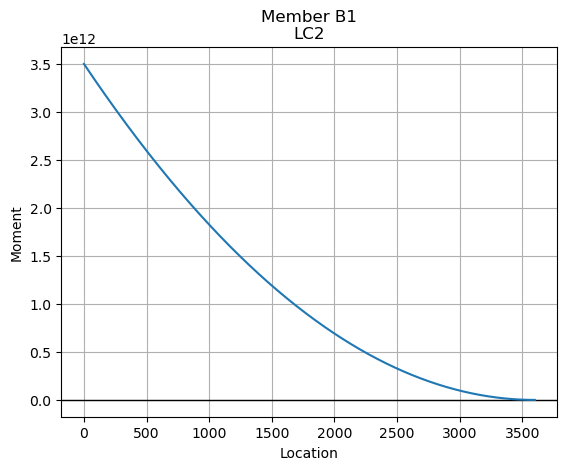

In [42]:
#ALL UNITS ARE IN N,mm
from math import sqrt

#Step1: Calculate E_c and I of the beam
L= 3600 #Length of the beam (mm)
f_c= 45 #Grade of concrete (MPa)
D= 600 #Depth of beam (mm)
B= 300 #Bredth of beam (mm)
D_c= 2.5 #Density of concrete (N/mm3)

E_c= 4700*sqrt(f_c) #Modulus of Elasticity of concrete (MPa)
I_maj= B*D**3/12 #I of the beam in the strong axis (mm^4)
I_min= D*B**3/12 #I of the beam in the weak axis (mm^4)

#Step2: Create an empty model
beam_model_T02 = FEModel3D() 

# Step3:Define nodes (All co-ordinates are X,Y,Z)
beam_model_T02.add_node("N01", 0, 0, 0)
beam_model_T02.add_node("N02", L, 0, 0)

#Step4: Define member and connect to nodes
beam_model_T02.add_member("B1",'N01','N02', E_c, 1.28e9, I_min, I_maj, 0.0648, 18e4)

#Step5: Define supports
beam_model_T02.def_support("N01", True, True, True, True, True, True) #Fixed support
beam_model_T02.def_support("N02") #Free End

#Step6: Define Loads and Load combinations
beam_model_T02.add_load_combo('LC1', {'D':1.4})
beam_model_T02.add_load_combo('LC2', {'D':1.2, 'L':1.6})

beam_model_T02.add_member_dist_load("B1", 'Fy', -D_c*D*B, -D_c*D*B, case= 'D') #UDL of selfweight (N/mm)
beam_model_T02.add_member_dist_load("B1", 'Fy', -60, -60, case= 'L') #UDL of Live Load (N/mm)
beam_model_T02.add_member_pt_load("B1", 'Fy', -175000, 2200, case= 'L') #Point Live load @ 2.2m from fixed end. (N)

#Step7: Run Analysis
beam_model_T02.analyze()

#Results
#1. Print reactions
print(beam_model_T02.Nodes['N01'].RxnFY)
print(beam_model_T02.Nodes['N02'].RxnFY)

#2. Plot shear diagram
beam_model_T02.Members['B1'].plot_shear("Fy", "LC1", 1000)
beam_model_T02.Members['B1'].plot_shear("Fy", "LC2", 1000)

#3. Plot moment diagram
beam_model_T02.Members['B1'].plot_moment("Mz", "LC1", 1000)
beam_model_T02.Members['B1'].plot_moment("Mz", "LC2", 1000)


# Task 03

**Option A:** If you are from the US and want to try using US units:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 168 inches long
* E and Iz are 58e3 ksi and 1200 ${in^4}$, respectively
* Vertical supports @:
    * 24 inches, 96 inches, 132  inches
* Loads as follows:
    * Point load: 5 kips, @ 48 inches
    * Uniform distributed load: 60 lbs/inch starting @ 12 inches, ending @ 120 inches
    
    
**Option B:** If you are from pretty much anywhere else:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 4200 mm long
* E and Iz are 200e3 ksi and 854e6 ${mm^4}$, respectively
* Vertical supports @:
    * 600 mm, 2440 mm, 3350 mm
* Loads as follows:
    * Point load: 25 kN, @ 1200 inches
    * Uniform distributed load: 2.4 kN starting at 300 mm, ending @ 3000 mm
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

## Task 03 Response

{'LC1': 0.0}
{'LC1': 7.5655308641975205}
{'LC1': 10.268740740740741}
{'LC1': -1.7622716049382705}
{'LC1': 0.0}


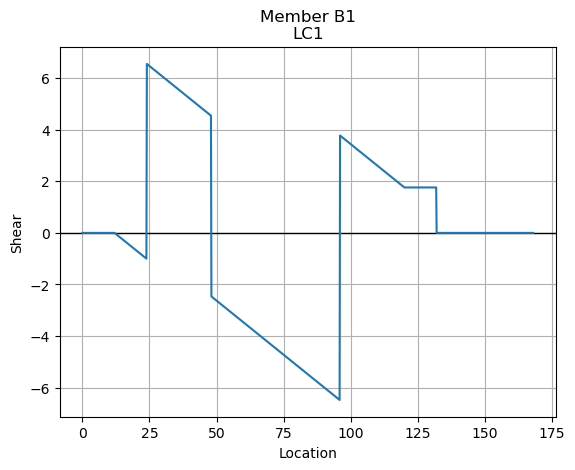

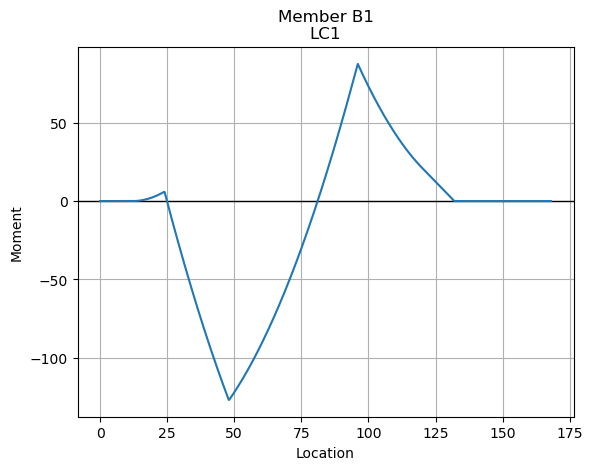

In [11]:
#Option A
#All units are in kips, inch

#Step1: Create an empty model
beam_model_T03= FEModel3D()

#Step2:Define nodes (All co-ordinates are X,Y,Z)
beam_model_T03.add_node('N01', 0, 0, 0)
beam_model_T03.add_node('N02', 24, 0, 0)
beam_model_T03.add_node('N03', 96, 0, 0)
beam_model_T03.add_node('N04', 132, 0, 0)
beam_model_T03.add_node('N05', 168, 0, 0)

#Step3: Define member and connect to nodes
beam_model_T03.add_member("B1", 'N01', 'N05', 58e3, 77e3, 1e3, 1200, 30e3, 1500)

#Step4: Define supports
beam_model_T03.def_support('N01')
beam_model_T03.def_support('N02', True, True, True, True)
beam_model_T03.def_support('N03', True, True, True, True)
beam_model_T03.def_support('N04', True, True, True, True)
beam_model_T03.def_support('N05')

#Step5: Define Loads and Load combinations
beam_model_T03.add_load_combo('LC1', {'D': 1.4})

beam_model_T03.add_member_pt_load('B1', 'Fy', -5, 48, case='D')
beam_model_T03.add_member_dist_load('B1', 'Fy', -0.06, -0.06, 12, 120, case='D')

#Step6: Run Analysis
beam_model_T03.analyze()
render_model(beam_model_T03, labels=False, combo_name="LC1", annotation_size=1)

#Results
#1. Print reactions
print(beam_model_T03.Nodes['N01'].RxnFY)
print(beam_model_T03.Nodes['N02'].RxnFY)
print(beam_model_T03.Nodes['N03'].RxnFY)
print(beam_model_T03.Nodes['N04'].RxnFY)
print(beam_model_T03.Nodes['N05'].RxnFY)

#2. Plot shear diagram
beam_model_T03.Members['B1'].plot_shear("Fy", "LC1", 1000)

#3. Plot moment diagram
beam_model_T03.Members['B1'].plot_moment("Mz", "LC1", 1000)

# 🧳 Submit Workbook 00!

We will use this procedure for submitting all Workbooks in this course. This one is going to be the "practice" submission.

[Log in to Eduflow](https://app.eduflow.com/login) and, in your PfSE course, see the **Workbook 00 Submission** instructions.